In [52]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.models import load_model
import keras
import os
import numpy as np
import cv2
import numpy
import matplotlib.pyplot as plt
import skimage
import csv
from skimage import data

In [81]:
import h5py

In [20]:
def load_data(data_dir):
    # Get all subdirectories of data_dir. Each represents a label.
    directories = [d for d in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, d))]
    # Loop through the label directories and collect the data in
    # two lists, labels and images.
    labels = []
    images = []
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    return images, labels

images, labels = load_data("/Users/uliakaliberda/PycharmProjects/StartingNN/BlgClsf/Training")

In [21]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.21, 0.72, 0.07])

In [22]:
images_test, labels_test = load_data("/Users/uliakaliberda/PycharmProjects/StartingNN/BlgClsf/Testing")

In [23]:
def createModel():
    model = Sequential()
    model.add(Conv2D(100, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(100, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
     
    return model

<class 'numpy.ndarray'>


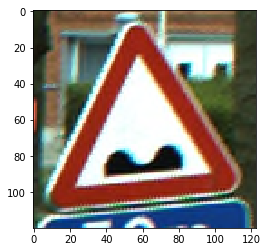

In [24]:
plt.imshow(images[1])
print(type(images[1]))

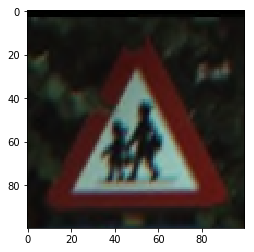

In [25]:
resized_image = cv2.resize(images[200], (100, 100)) 
plt.imshow(resized_image)

In [26]:
for i in range(len(images)):
    images[i] = cv2.resize(images[i], (100, 100)) 
    

In [27]:
for i in range(len(images_test)):
    images_test[i] = cv2.resize(images_test[i], (100, 100)) 

In [28]:
images = np.asarray(images).reshape(len(images), 100, 100, 3)
images_test = np.asarray(images_test).reshape(len(images_test), 100, 100, 3)
print(images.shape)

(4575, 100, 100, 3)


In [29]:
print(labels[:30])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [30]:
nClasses = 62
input_shape = (100,100,3)
model = createModel()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 100, 100, 100)     2800      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 98, 98, 100)       90100     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 49, 49, 100)       0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 49, 49, 100)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 49, 49, 64)        57664     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 47, 47, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 23, 23, 64)        0         
__________

In [64]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [65]:
batch_size = 1000
epochs = 5
history = model.fit(images, labels,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          shuffle = True,
          validation_data=(images_test[:1000], labels_test[:1000]))

Train on 4575 samples, validate on 1000 samples
Epoch 1/5
4575/4575 [==============================] - 1275s 279ms/step - loss: 2.8754 - acc: 0.5333 - val_loss: 3.6831 - val_acc: 0.0630
Epoch 2/5
4575/4575 [==============================] - 883s 193ms/step - loss: 2.6404 - acc: 0.4509 - val_loss: 0.6016 - val_acc: 0.8640
Epoch 3/5
4575/4575 [==============================] - 874s 191ms/step - loss: 0.3026 - acc: 0.9294 - val_loss: 0.3046 - val_acc: 0.9400
Epoch 4/5
4575/4575 [==============================] - 898s 196ms/step - loss: 0.1180 - acc: 0.9677 - val_loss: 0.3172 - val_acc: 0.9350
Epoch 5/5
4575/4575 [==============================] - 954s 209ms/step - loss: 0.0998 - acc: 0.9740 - val_loss: 0.3122 - val_acc: 0.9350


In [66]:
score = model.evaluate(images_test, labels_test, verbose=0)

In [67]:
print(score )

[0.2357218119472987, 0.9464285714285714]


Text(0.5,1,'Accuracy Curves')

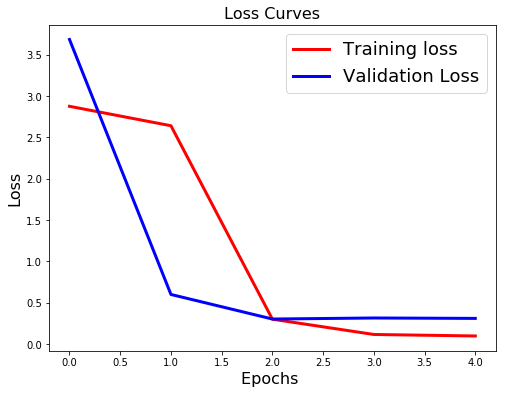

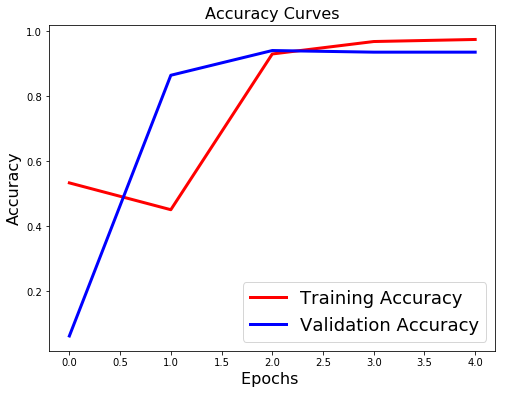

In [68]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

@misc{chollet2015keras,
  title={Keras},
  author={Chollet, Fran\c{c}ois and others},
  year={2015},
  howpublished={\url{https://keras.io}},
}

In [86]:
model.save_weights('95prctng20ephsadamadadelta.h5')

ImportError: `save_weights` requires h5py.

In [73]:
model.predict_classes(images_test[1000:1200])


array([31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31,
       31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31,
       31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31,
       31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31,
       31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31,
       32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,
       32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,
       32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 28,
       32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,
       32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,
       32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,
       32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32])

In [72]:
print(labels_test[1000:1200])


[31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
